In [15]:
import plotly
import numpy as np
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [11]:
def get_sankey(df: pd.DataFrame, stage_columns: list, value_column: str, title='Sankey'):
    """
    """
    
    colorPalette = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464']
    
    labelList = []
    colorNumList = []
    
    for catCol in stage_columns:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(stage_columns)-1):
        if i==0:
            sourceTargetDf = df[[stage_columns[i],stage_columns[i+1],value_column]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[stage_columns[i],stage_columns[i+1],value_column]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

In [8]:
data = pd.DataFrame({
    "Stg1": ['A'] * 8 + ['B'] * 3,
    "Stg2": ['AP'] * 3 + ['AC'] * 3 + ['AB'] * 2 + ['BE', 'BR', 'BA'],
    "Stg3": ['APP', 'APE', 'APA', 'ACT', 'ACC', 'ACE', 'ABL', 'ABO', 'BET', 'BRE', 'BAK'],
    "Stg4": ['APPL', 'APEX', 'APAR', 'ACTO', 'ACCE', 'ACER', 'ABLE', 'ABOU', np.NaN, np.NaN, np.NaN],
    "Cnt": [5, 2, 3, 8, 2, 10, 1, 3, 4, 6, 3]
})

In [9]:
data

,Stg1,Stg2,Stg3,Stg4,Cnt
0,A,AP,APP,APPL,5
1,A,AP,APE,APEX,2
2,A,AP,APA,APAR,3
3,A,AC,ACT,ACTO,8
4,A,AC,ACC,ACCE,2
5,A,AC,ACE,ACER,10
6,A,AB,ABL,ABLE,1
7,A,AB,ABO,ABOU,3
8,B,BE,BET,NaN,4
9,B,BR,BRE,NaN,6


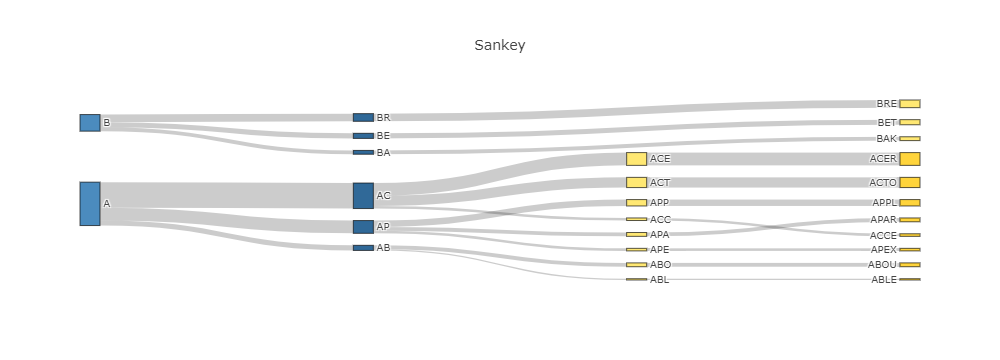

In [16]:
fig = get_sankey(data, stage_columns=['Stg1', 'Stg2', 'Stg3', 'Stg4'], value_column='Cnt')
iplot(fig, validate=False)